In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [3]:
df_train.shape

(60000, 785)

In [4]:
28 * 28 

784

In [23]:
X_train = df_train.values[:, 1:]/255
X_test = df_test.values[:, 1:]/255

y_train = df_train.values[:, 0]
y_test = df_test.values[:, 0]


In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [25]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

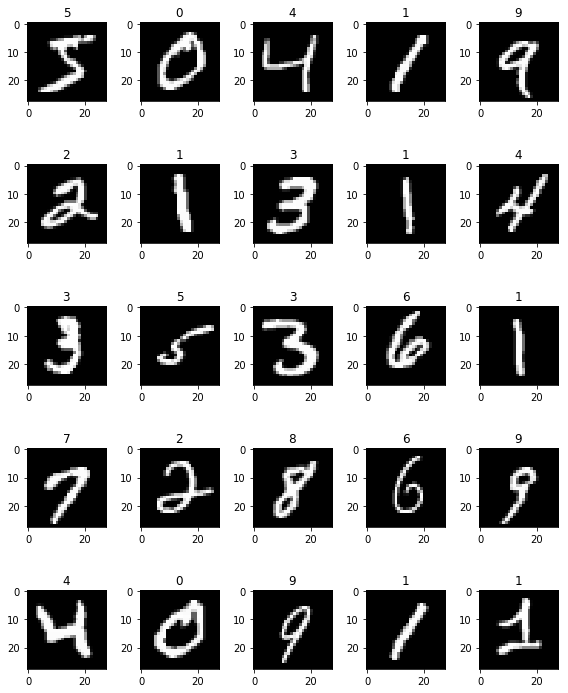

In [26]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

Text(0, 0.5, 'Frequency')

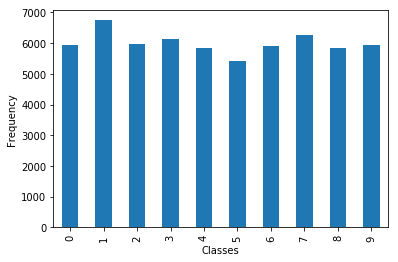

In [27]:
pd.Series(y_train).value_counts().sort_index().plot.bar()
plt.xlabel("Classes")
plt.ylabel("Frequency")

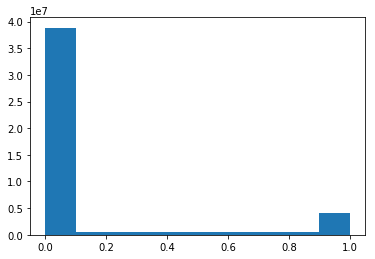

In [28]:
plt.hist(X_train.flatten());

In [29]:
(X_train == 0).sum()/np.product(X_train.shape)

0.8087977040816327

In [30]:
from sklearn import * 

In [34]:
%%time

est = linear_model.SGDClassifier(loss = "log", alpha = 0.015, max_iter=200
            , tol = 1e-04, verbose=False, n_jobs=12
            , learning_rate = "invscaling", eta0= 0.01, random_state = 1)

est.fit(X_train, y_train)
print("training accuracy", est.score(X_train, y_train))
print("test accuracy", est.score(X_test, y_test))


training accuracy 0.87585
test accuracy 0.8847
CPU times: user 1min 56s, sys: 201 ms, total: 1min 57s
Wall time: 17 s


In [35]:
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

In [36]:
summary = pd.DataFrame(dict(actual = y_test, prediction = y_test_pred))
summary["error"] = y_test != y_test_pred

In [39]:
agg = summary[summary.error].pivot_table("error", "actual", "prediction", aggfunc = "count")

In [40]:
agg

prediction,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,NaN,NaN,2.0,2.0,NaN,1.0,13.0,1.0,8.0,NaN
1,NaN,NaN,4.0,3.0,1.0,2.0,4.0,NaN,24.0,NaN
2,12.0,19.0,NaN,24.0,18.0,NaN,23.0,20.0,48.0,9.0
3,6.0,1.0,18.0,NaN,1.0,29.0,7.0,15.0,24.0,11.0
4,1.0,7.0,5.0,NaN,NaN,1.0,13.0,1.0,14.0,63.0
5,21.0,11.0,5.0,67.0,23.0,NaN,23.0,12.0,52.0,16.0
6,17.0,3.0,4.0,2.0,10.0,16.0,NaN,1.0,7.0,NaN
7,2.0,31.0,28.0,4.0,12.0,NaN,4.0,NaN,2.0,36.0
8,8.0,14.0,11.0,32.0,10.0,21.0,14.0,13.0,NaN,13.0


In [41]:
import seaborn as sns

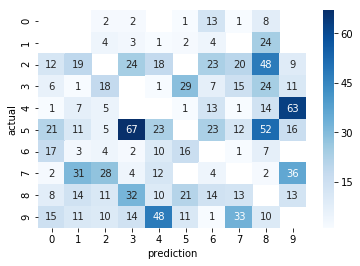

In [44]:
sns.heatmap(agg, cmap = "Blues", annot=True)

In [45]:
est.coef_.shape

(10, 784)

In [46]:
y_test_prob = est.predict_proba(X_test)

In [47]:
y_test_prob.shape

(10000, 10)

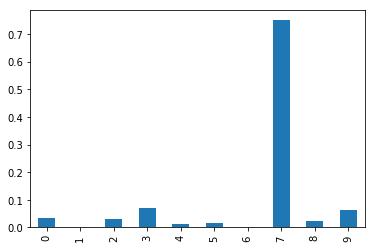

In [50]:
pd.Series(y_test_prob[0]).plot.bar()

In [51]:
y_test_prob[0].sum()

1.0

In [52]:
y_test_pred[0]

7

In [53]:
y_test[0]

7

In [60]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [54]:
import keras

Using TensorFlow backend.


In [65]:
model = keras.Sequential()

adam = keras.optimizers.Adam()

model.add(keras.layers.InputLayer(input_shape = (784,)))
model.add(keras.layers.Dense(440, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.summary()
model.compile(optimizer = adam
              , loss = keras.losses.categorical_crossentropy
              , metrics = ["acc"])
model.fit(X_train, Y_train, epochs = 10, batch_size = 128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 440)               345400    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               44100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 390,510
Trainable params: 390,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2435 - acc: 0.9298
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0918 - acc: 0.9723
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0601 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0424 - acc: 0.9869


In [64]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 21us/step


[0.09716496171103554, 0.9767]